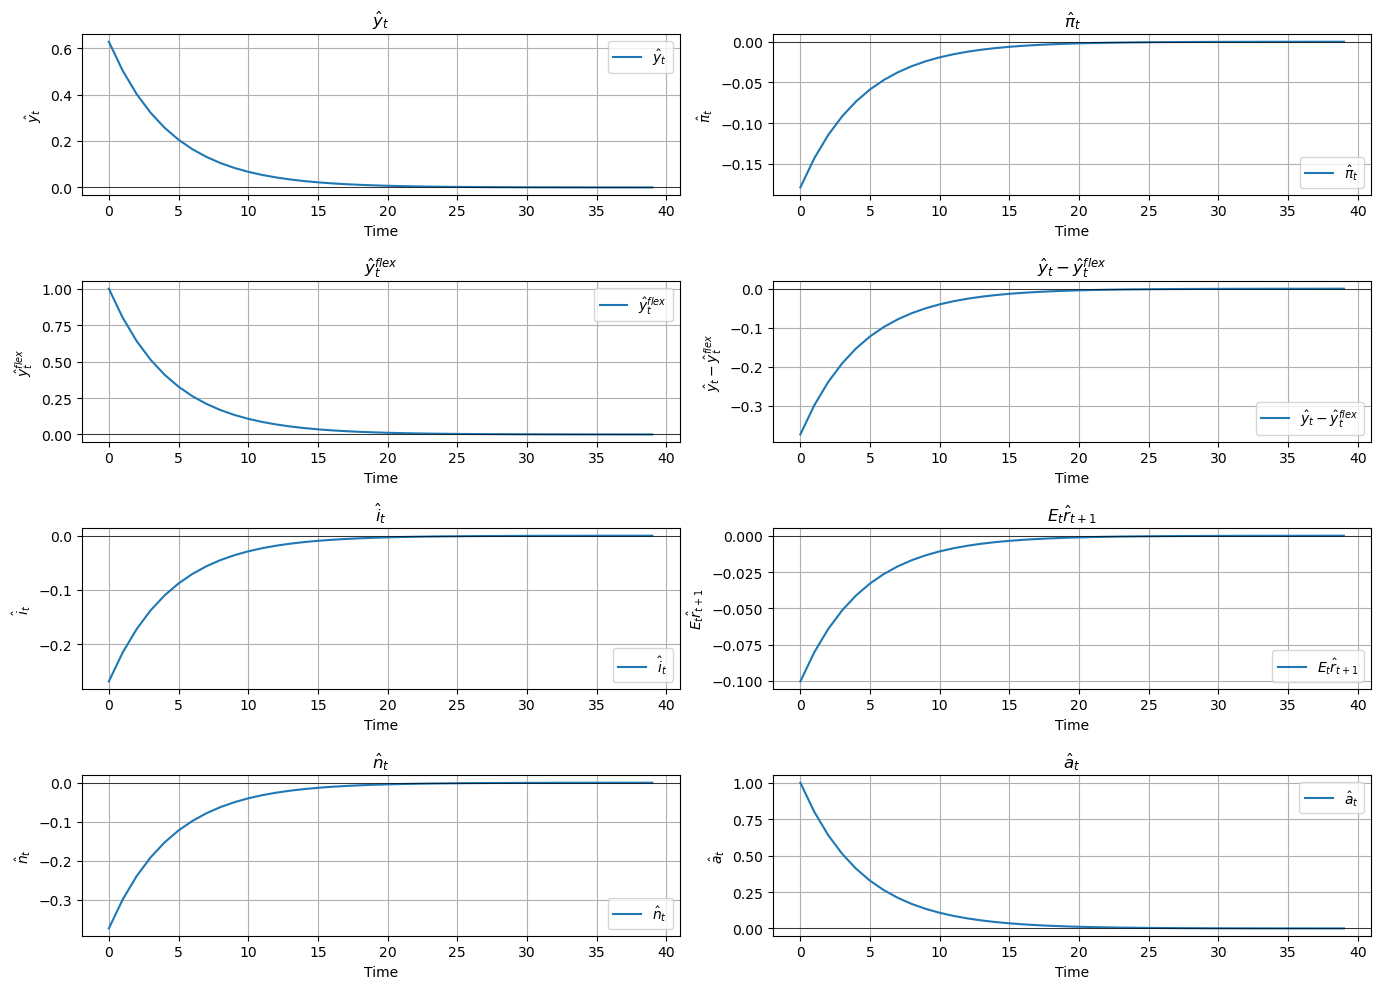

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
beta = 0.99
sigma = 1
kappa = 0.1
rho_a = 0.8
phi_pi = 1.5

# Other parameters 
varphi = 0.5  # assumption
gamma = 1  #(sigma = 1/gamma)


# Define the AR(1) process for at
def generate_a_t(rho_a, T):
    a_t = np.zeros(T)
    a_t[0] = 1  # initial shock
    for t in range(1, T):
        a_t[t] = rho_a * a_t[t-1]
    return a_t

# Time horizon
T = 40

# Generate the time series for at
a_t = generate_a_t(rho_a, T)

# Calculate yt, pi_t, yt_flex

# Coefficients for the given formulas
coef_y = (sigma * kappa * (rho_a - phi_pi) * (rho_a - 1) * (1 + varphi)) / \
         ((1 - rho_a) * ((1 - rho_a) * (1 - beta * rho_a) - kappa * (rho_a - phi_pi)) * (gamma + varphi))

coef_pi = (kappa * (rho_a - 1) * (1 + varphi)) / \
          (((1 - rho_a) * (1 - beta * rho_a) - kappa * (rho_a - phi_pi)) * (gamma + varphi))

coef_y_flex = (1 + varphi) / (gamma + varphi)

# Calculate the responses over time
y_t = coef_y * a_t
pi_t = coef_pi * a_t
y_t_flex = coef_y_flex * a_t
y_t_gap = y_t - y_t_flex

# Define it, Et_pit+1 Et_rt+1, nt 
i_t = phi_pi * pi_t  
Et_pit1 = coef_pi * rho_a * np.roll(a_t, -1) # Expected inflation on t+1
Et_pit1[-1] = 0  # Correct the last value
Et_rt1 = np.roll(i_t, -1) - Et_pit1  # Expected real interest rate on t+1
Et_rt1[-1] = 0  # Correct the last value
n_t = y_t - a_t  # Using Galli

# Plot the impulse response functions
plt.figure(figsize=(14, 10))

variables = [y_t, pi_t, y_t_flex, y_t_gap, i_t, Et_rt1, n_t, a_t]
labels = ['$\\hat{y}_t$', '$\\hat{\\pi}_t$', '$\\hat{y}_t^{flex}$', '$\\hat{y}_t - \\hat{y}_t^{flex}$', 
          '$\\hat{i}_t$', '$E_t\\hat{r}_{t+1}$', '$\\hat{n}_t$', '$\\hat{a}_t$']

for i, (var, label) in enumerate(zip(variables, labels)):
    plt.subplot(4, 2, i + 1)
    plt.plot(var, label=label)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.title(label)
    plt.xlabel('Time')
    plt.ylabel(label)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()
